In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import unicodedata
import seaborn as sns; sns.set()
from datetime import datetime


pd.set_option('display.max_rows', 6000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [2]:
data_dir = '../../datasets/'

dfPop = pd.read_csv(data_dir + 'datasus/faixas_niveis_2020.csv', delimiter=';')

dfPop

nivel  CodEst    CodMun Sexo  De 0 a 4 anos  De 5 a 9 anos  De 10 a 14 anos  De 15 a 19 anos  De 20 a 24 anos  De 25 a 29 anos  De 30 a 34 anos  De 35 a 39 anos  De 40 a 44 anos  De 45 a 49 anos  De 50 a 54 anos  De 55 a 59 anos  De 60 a 64 anos  De 65 a 69 anos  De 70 a 74 anos  De 75 a 79 anos  De 80 anos ou mais
0         N     NaN       NaN    F        7193517        7158663          7241977          7748675          8520327          8501472          8672478          8679141          8028154          7076092          6576798          5951176          5033166          4012245          3009884          2072284             2752002
1         N     NaN       NaN    M        7536783        7491621          7563503          8042215          8712946          8484387          8532936          8347424          7574841          6576416          6041004          5306094          4350558          3336996          2398773          1542100             1689044
2         E    11.0       NaN    F          68339          66378            67020            73504            77092            78121            76628            74691            67166            58596            50381            41457            31993            23135            14901             9485                9404
3         E    11.0       NaN    M          71586          69560            70266            76484            79509            78871            78422            74905            66545            56831            51997            43973            33258            23038            15009             9093                8822
4         E    12.0       NaN    F          40507          41477            43925            45538            43258            38432            35075            33865            29686            23686            19599            15028            11958             9015             6382             4639                5080
...     ...     ...       ...  ...            ...            ...              ...              ...              ...              ...              ...              ...              ...              ...              ...              ...              ...              ...              ...              ...                 ...
11191     M    52.0  522200.0    M            494            492              430              496              538              563              553              544              553              502              483              390              318              196              172               98                 112
11192     M    52.0  522205.0    M            342            344              323              348              366              375              439              406              379              340              296              253              161              133               81               58                  60
11193     M    52.0  522220.0    M            290            272              242              290              328              325              350              499              309              198              153              142              105               50               43               27                  23
11194     M    52.0  522230.0    M            224            225              178              183              217              238              231              195              235              239              216              196              168              112               79               52                  39
11195     M    53.0  530010.0    M         105681          97123           105816           121390           126646           124607           130181           132624           121379           100623            86940            68925            51302            37900            25584            15677               15627

[11196 rows x 21 columns]

In [19]:
dfPop.dtypes

nivel                  object
CodEst                float64
CodMun                float64
Sexo                   object
De 0 a 4 anos           int64
De 5 a 9 anos           int64
De 10 a 14 anos         int64
De 15 a 19 anos         int64
De 20 a 24 anos         int64
De 25 a 29 anos         int64
De 30 a 34 anos         int64
De 35 a 39 anos         int64
De 40 a 44 anos         int64
De 45 a 49 anos         int64
De 50 a 54 anos         int64
De 55 a 59 anos         int64
De 60 a 64 anos         int64
De 65 a 69 anos         int64
De 70 a 74 anos         int64
De 75 a 79 anos         int64
De 80 anos ou mais      int64
dtype: object

In [3]:
df = pd.read_csv(data_dir + 'df_tratado.csv')

df

Unnamed: 0 vacina_dataAplicacao vacina_descricao_dose                                        paciente_id                          vacina_nome  paciente_idade paciente_enumSexoBiologico
0                0           2021-03-03                2ªDose  fb8462d621c5d860cc899aa882e2cd8221c6a0a593103d...  Covid-19-Coronavac-Sinovac/Butantan              32                          M
1                1           2021-03-31                1ªDose  249c26ac633a6ece74f0de3a5959fac337ed3febeee52a...  Covid-19-Coronavac-Sinovac/Butantan              69                          F
2                2           2021-02-09                1ªDose  cc8a272ceb38d8ac53d222103c0576fe227ed6946be80e...  Covid-19-Coronavac-Sinovac/Butantan              81                          M
3                3           2021-04-02                1ªDose  f2d24c0febb350238e07c5f42b92a6f0694ab529b606a1...  Covid-19-Coronavac-Sinovac/Butantan              67                          F
4                4           2021-03-22                1ªDose  734dff8d32737a5afe973c59b0b5b253de7640f61dee8e...         Vacina Covid-19 - Covishield              40                          M
...            ...                  ...                   ...                                                ...                                  ...             ...                        ...
386029      386029           2021-04-01                1ªDose  ab970197439aaa04bec9fe535ea05942094e27e6e166c1...         Vacina Covid-19 - Covishield              69                          F
386030      386030           2021-04-21                1ªDose  36c98f325f78491405726c82a9cbfb28a829dbe6816fb5...         Vacina Covid-19 - Covishield              65                          F
386031      386031           2021-04-21                1ªDose  195f0fc215a8fbd692cce2683bf2a9b75bd243ce0baced...         Vacina Covid-19 - Covishield              65                          M
386032      386032           2021-04-23                2ªDose  e5578f792c0dfcf50cdb317360139d3e6afffafbd75bbd...  Covid-19-Coronavac-Sinovac/Butantan              72                          F
386033      386033           2021-04-26                1ªDose  3613fc69b7617a70cefdadd16e17e0f944143a8fc961a6...         Vacina Covid-19 - Covishield              64                          M

[386034 rows x 7 columns]

<AxesSubplot:>

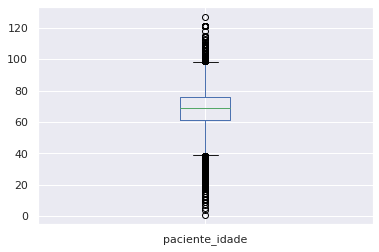

In [4]:
df.paciente_idade.plot.box()

In [5]:
faixas = [i for i in range(0, 81, 5)] + [200]

faixas

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 200]

In [6]:
labels = dfPop.columns[-17:]

labels

Index(['De 0 a 4 anos', 'De 5 a 9 anos', 'De 10 a 14 anos', 'De 15 a 19 anos', 'De 20 a 24 anos', 'De 25 a 29 anos', 'De 30 a 34 anos', 'De 35 a 39 anos', 'De 40 a 44 anos', 'De 45 a 49 anos', 'De 50 a 54 anos', 'De 55 a 59 anos', 'De 60 a 64 anos', 'De 65 a 69 anos', 'De 70 a 74 anos', 'De 75 a 79 anos', 'De 80 anos ou mais'], dtype='object')

In [7]:
df['faixa'] = pd.cut(df['paciente_idade'], bins=faixas, labels=labels, right=False)

df

Unnamed: 0 vacina_dataAplicacao vacina_descricao_dose                                        paciente_id                          vacina_nome  paciente_idade paciente_enumSexoBiologico               faixa
0                0           2021-03-03                2ªDose  fb8462d621c5d860cc899aa882e2cd8221c6a0a593103d...  Covid-19-Coronavac-Sinovac/Butantan              32                          M     De 30 a 34 anos
1                1           2021-03-31                1ªDose  249c26ac633a6ece74f0de3a5959fac337ed3febeee52a...  Covid-19-Coronavac-Sinovac/Butantan              69                          F     De 65 a 69 anos
2                2           2021-02-09                1ªDose  cc8a272ceb38d8ac53d222103c0576fe227ed6946be80e...  Covid-19-Coronavac-Sinovac/Butantan              81                          M  De 80 anos ou mais
3                3           2021-04-02                1ªDose  f2d24c0febb350238e07c5f42b92a6f0694ab529b606a1...  Covid-19-Coronavac-Sinovac/Butantan              67                          F     De 65 a 69 anos
4                4           2021-03-22                1ªDose  734dff8d32737a5afe973c59b0b5b253de7640f61dee8e...         Vacina Covid-19 - Covishield              40                          M     De 40 a 44 anos
...            ...                  ...                   ...                                                ...                                  ...             ...                        ...                 ...
386029      386029           2021-04-01                1ªDose  ab970197439aaa04bec9fe535ea05942094e27e6e166c1...         Vacina Covid-19 - Covishield              69                          F     De 65 a 69 anos
386030      386030           2021-04-21                1ªDose  36c98f325f78491405726c82a9cbfb28a829dbe6816fb5...         Vacina Covid-19 - Covishield              65                          F     De 65 a 69 anos
386031      386031           2021-04-21                1ªDose  195f0fc215a8fbd692cce2683bf2a9b75bd243ce0baced...         Vacina Covid-19 - Covishield              65                          M     De 65 a 69 anos
386032      386032           2021-04-23                2ªDose  e5578f792c0dfcf50cdb317360139d3e6afffafbd75bbd...  Covid-19-Coronavac-Sinovac/Butantan              72                          F     De 70 a 74 anos
386033      386033           2021-04-26                1ªDose  3613fc69b7617a70cefdadd16e17e0f944143a8fc961a6...         Vacina Covid-19 - Covishield              64                          M     De 60 a 64 anos

[386034 rows x 8 columns]

In [18]:
df.iloc[0, :]['vacina_nome'][:2]

'Co'

In [8]:
dfPopNivel = dfPop.query('nivel=="N"').iloc[:,-18:].set_index('Sexo').stack().to_frame().reset_index()

dfPopNivel.columns = ['Sexo', 'Faixa', 'Total']

dfPopNivel

Sexo               Faixa    Total
0     F       De 0 a 4 anos  7193517
1     F       De 5 a 9 anos  7158663
2     F     De 10 a 14 anos  7241977
3     F     De 15 a 19 anos  7748675
4     F     De 20 a 24 anos  8520327
5     F     De 25 a 29 anos  8501472
6     F     De 30 a 34 anos  8672478
7     F     De 35 a 39 anos  8679141
8     F     De 40 a 44 anos  8028154
9     F     De 45 a 49 anos  7076092
10    F     De 50 a 54 anos  6576798
11    F     De 55 a 59 anos  5951176
12    F     De 60 a 64 anos  5033166
13    F     De 65 a 69 anos  4012245
14    F     De 70 a 74 anos  3009884
15    F     De 75 a 79 anos  2072284
16    F  De 80 anos ou mais  2752002
17    M       De 0 a 4 anos  7536783
18    M       De 5 a 9 anos  7491621
19    M     De 10 a 14 anos  7563503
20    M     De 15 a 19 anos  8042215
21    M     De 20 a 24 anos  8712946
22    M     De 25 a 29 anos  8484387
23    M     De 30 a 34 anos  8532936
24    M     De 35 a 39 anos  8347424
25    M     De 40 a 44 anos  7574841
26    M     De 45 a 49 anos  6576416
27    M     De 50 a 54 anos  6041004
28    M     De 55 a 59 anos  5306094
29    M     De 60 a 64 anos  4350558
30    M     De 65 a 69 anos  3336996
31    M     De 70 a 74 anos  2398773
32    M     De 75 a 79 anos  1542100
33    M  De 80 anos ou mais  1689044

In [9]:
dfVac = df.groupby(['paciente_enumSexoBiologico', 'faixa', 'vacina_descricao_dose']).size().reset_index()

dfVac.columns = ['Sexo', 'Faixa', 'Dose', 'Vacinados']

# if '2ªDose' not in dfVac['Dose'] : dfVac = dfVac.merge(pd.DataFrame({'Dose':['2ªDose']}))

dfVac['Vacinados'] = dfVac['Vacinados'] * 100 #TODO: Retirar na produção

dfVac

Sexo               Faixa    Dose  Vacinados
0     F       De 0 a 4 anos  1ªDose          0
1     F       De 0 a 4 anos  2ªDose          0
2     F       De 5 a 9 anos  1ªDose        100
3     F       De 5 a 9 anos  2ªDose          0
4     F     De 10 a 14 anos  1ªDose        300
5     F     De 10 a 14 anos  2ªDose        200
6     F     De 15 a 19 anos  1ªDose      49400
7     F     De 15 a 19 anos  2ªDose      27000
8     F     De 20 a 24 anos  1ªDose     319500
9     F     De 20 a 24 anos  2ªDose     198800
10    F     De 25 a 29 anos  1ªDose     444300
11    F     De 25 a 29 anos  2ªDose     296300
12    F     De 30 a 34 anos  1ªDose     501200
13    F     De 30 a 34 anos  2ªDose     361800
14    F     De 35 a 39 anos  1ªDose     573100
15    F     De 35 a 39 anos  2ªDose     392300
16    F     De 40 a 44 anos  1ªDose     505100
17    F     De 40 a 44 anos  2ªDose     371500
18    F     De 45 a 49 anos  1ªDose     445000
19    F     De 45 a 49 anos  2ªDose     279400
20    F     De 50 a 54 anos  1ªDose     410900
21    F     De 50 a 54 anos  2ªDose     225800
22    F     De 55 a 59 anos  1ªDose     406800
23    F     De 55 a 59 anos  2ªDose     173400
24    F     De 60 a 64 anos  1ªDose    2108500
25    F     De 60 a 64 anos  2ªDose     226000
26    F     De 65 a 69 anos  1ªDose    2998800
27    F     De 65 a 69 anos  2ªDose     835500
28    F     De 70 a 74 anos  1ªDose    2485700
29    F     De 70 a 74 anos  2ªDose    1717200
30    F     De 75 a 79 anos  1ªDose    1755300
31    F     De 75 a 79 anos  2ªDose    1246700
32    F  De 80 anos ou mais  1ªDose    2307600
33    F  De 80 anos ou mais  2ªDose    1323100
34    M       De 0 a 4 anos  1ªDose        200
35    M       De 0 a 4 anos  2ªDose          0
36    M       De 5 a 9 anos  1ªDose        300
37    M       De 5 a 9 anos  2ªDose          0
38    M     De 10 a 14 anos  1ªDose        400
39    M     De 10 a 14 anos  2ªDose          0
40    M     De 15 a 19 anos  1ªDose      28700
41    M     De 15 a 19 anos  2ªDose      14100
42    M     De 20 a 24 anos  1ªDose     154200
43    M     De 20 a 24 anos  2ªDose      83200
44    M     De 25 a 29 anos  1ªDose     210800
45    M     De 25 a 29 anos  2ªDose     132400
46    M     De 30 a 34 anos  1ªDose     256800
47    M     De 30 a 34 anos  2ªDose     147600
48    M     De 35 a 39 anos  1ªDose     272100
49    M     De 35 a 39 anos  2ªDose     157200
50    M     De 40 a 44 anos  1ªDose     271600
51    M     De 40 a 44 anos  2ªDose     151900
52    M     De 45 a 49 anos  1ªDose     250300
53    M     De 45 a 49 anos  2ªDose     120200
54    M     De 50 a 54 anos  1ªDose     225400
55    M     De 50 a 54 anos  2ªDose     106900
56    M     De 55 a 59 anos  1ªDose     227300
57    M     De 55 a 59 anos  2ªDose      86300
58    M     De 60 a 64 anos  1ªDose    1706200
59    M     De 60 a 64 anos  2ªDose     159600
60    M     De 65 a 69 anos  1ªDose    2454000
61    M     De 65 a 69 anos  2ªDose     657600
62    M     De 70 a 74 anos  1ªDose    1964400
63    M     De 70 a 74 anos  2ªDose    1337000
64    M     De 75 a 79 anos  1ªDose    1323400
65    M     De 75 a 79 anos  2ªDose     937600
66    M  De 80 anos ou mais  1ªDose    1406800
67    M  De 80 anos ou mais  2ªDose     772300

In [10]:
dfFinal = dfVac.merge(dfPopNivel)
dfFinal = dfFinal.set_index(['Sexo', 'Dose', 'Faixa'])
dfFinal

Vacinados    Total
Sexo Dose   Faixa                                 
F    1ªDose De 0 a 4 anos               0  7193517
     2ªDose De 0 a 4 anos               0  7193517
     1ªDose De 5 a 9 anos             100  7158663
     2ªDose De 5 a 9 anos               0  7158663
     1ªDose De 10 a 14 anos           300  7241977
     2ªDose De 10 a 14 anos           200  7241977
     1ªDose De 15 a 19 anos         49400  7748675
     2ªDose De 15 a 19 anos         27000  7748675
     1ªDose De 20 a 24 anos        319500  8520327
     2ªDose De 20 a 24 anos        198800  8520327
     1ªDose De 25 a 29 anos        444300  8501472
     2ªDose De 25 a 29 anos        296300  8501472
     1ªDose De 30 a 34 anos        501200  8672478
     2ªDose De 30 a 34 anos        361800  8672478
     1ªDose De 35 a 39 anos        573100  8679141
     2ªDose De 35 a 39 anos        392300  8679141
     1ªDose De 40 a 44 anos        505100  8028154
     2ªDose De 40 a 44 anos        371500  8028154
     1ªDose De 45 a 49 anos        445000  7076092
     2ªDose De 45 a 49 anos        279400  7076092
     1ªDose De 50 a 54 anos        410900  6576798
     2ªDose De 50 a 54 anos        225800  6576798
     1ªDose De 55 a 59 anos        406800  5951176
     2ªDose De 55 a 59 anos        173400  5951176
     1ªDose De 60 a 64 anos       2108500  5033166
     2ªDose De 60 a 64 anos        226000  5033166
     1ªDose De 65 a 69 anos       2998800  4012245
     2ªDose De 65 a 69 anos        835500  4012245
     1ªDose De 70 a 74 anos       2485700  3009884
     2ªDose De 70 a 74 anos       1717200  3009884
     1ªDose De 75 a 79 anos       1755300  2072284
     2ªDose De 75 a 79 anos       1246700  2072284
     1ªDose De 80 anos ou mais    2307600  2752002
     2ªDose De 80 anos ou mais    1323100  2752002
M    1ªDose De 0 a 4 anos             200  7536783
     2ªDose De 0 a 4 anos               0  7536783
     1ªDose De 5 a 9 anos             300  7491621
     2ªDose De 5 a 9 anos               0  7491621
     1ªDose De 10 a 14 anos           400  7563503
     2ªDose De 10 a 14 anos             0  7563503
     1ªDose De 15 a 19 anos         28700  8042215
     2ªDose De 15 a 19 anos         14100  8042215
     1ªDose De 20 a 24 anos        154200  8712946
     2ªDose De 20 a 24 anos         83200  8712946
     1ªDose De 25 a 29 anos        210800  8484387
     2ªDose De 25 a 29 anos        132400  8484387
     1ªDose De 30 a 34 anos        256800  8532936
     2ªDose De 30 a 34 anos        147600  8532936
     1ªDose De 35 a 39 anos        272100  8347424
     2ªDose De 35 a 39 anos        157200  8347424
     1ªDose De 40 a 44 anos        271600  7574841
     2ªDose De 40 a 44 anos        151900  7574841
     1ªDose De 45 a 49 anos        250300  6576416
     2ªDose De 45 a 49 anos        120200  6576416
     1ªDose De 50 a 54 anos        225400  6041004
     2ªDose De 50 a 54 anos        106900  6041004
     1ªDose De 55 a 59 anos        227300  5306094
     2ªDose De 55 a 59 anos         86300  5306094
     1ªDose De 60 a 64 anos       1706200  4350558
     2ªDose De 60 a 64 anos        159600  4350558
     1ªDose De 65 a 69 anos       2454000  3336996
     2ªDose De 65 a 69 anos        657600  3336996
     1ªDose De 70 a 74 anos       1964400  2398773
     2ªDose De 70 a 74 anos       1337000  2398773
     1ªDose De 75 a 79 anos       1323400  1542100
     2ªDose De 75 a 79 anos        937600  1542100
     1ªDose De 80 anos ou mais    1406800  1689044
     2ªDose De 80 anos ou mais     772300  1689044

In [11]:
dfFinal.index.get_level_values(2).unique()

Index(['De 0 a 4 anos', 'De 5 a 9 anos', 'De 10 a 14 anos', 'De 15 a 19 anos', 'De 20 a 24 anos', 'De 25 a 29 anos', 'De 30 a 34 anos', 'De 35 a 39 anos', 'De 40 a 44 anos', 'De 45 a 49 anos', 'De 50 a 54 anos', 'De 55 a 59 anos', 'De 60 a 64 anos', 'De 65 a 69 anos', 'De 70 a 74 anos', 'De 75 a 79 anos', 'De 80 anos ou mais'], dtype='object', name='Faixa')

In [26]:
dfFinal.index.get_level_values(1).unique()

Index(['1ªDose', '2ªDose', '1ªDose', '2ªDose', '1ªDose', '2ªDose', '1ªDose', '2ªDose', '1ªDose', '2ªDose', '1ªDose', '2ªDose', '1ªDose', '2ªDose', '1ªDose', '2ªDose', '1ªDose', '2ªDose', '1ªDose', '2ªDose', '1ªDose', '2ªDose', '1ªDose', '2ªDose', '1ªDose', '2ªDose', '1ªDose', '2ªDose', '1ªDose', '2ªDose', '1ªDose', '2ªDose', '1ªDose', '2ªDose', '1ªDose', '2ªDose', '1ªDose', '2ªDose', '1ªDose', '2ªDose', '1ªDose', '2ªDose', '1ªDose', '2ªDose', '1ªDose', '2ªDose', '1ªDose', '2ªDose', '1ªDose', '2ªDose', '1ªDose', '2ªDose', '1ªDose', '2ªDose', '1ªDose', '2ªDose', '1ªDose', '2ªDose', '1ªDose', '2ªDose', '1ªDose', '2ªDose', '1ªDose', '2ªDose', '1ªDose', '2ªDose', '1ªDose', '2ªDose'], dtype='object', name='Dose')

In [30]:
'2ªDose' in dfFinal.index.get_level_values(1)

True

In [35]:

import plotly.graph_objs as go

import numpy as np

women_bins = dfFinal.loc[('F', '1ªDose'), 'Total'] * -1
men_bins = dfFinal.loc[('M', '1ªDose'), 'Total']



y = dfFinal.index.get_level_values(2).unique()

layout = go.Layout(title='Cobertura vacinal',
                    yaxis=go.layout.YAxis(title='Faixa etária'),
                   xaxis=go.layout.XAxis(
                        range=[-10000000, 10000000],
                        tickvals=[-10000000, -5000000, 0, 5000000, 10000000],
                        ticktext=['10M', '5M', 0, '5M', '10M'],
                       title='Mulheres X Homens'),
                   barmode='overlay',
                   bargap=0.1)

data = [go.Bar(y=y,
               x=men_bins,
               orientation='h',
               name='População',
               hoverinfo='x',
               hovertemplate = '%{x:,}<extra></extra>',
               marker=dict(color='powderblue')
               ),
        go.Bar(y=y,
               x=women_bins,
               orientation='h',
               showlegend=False,
               text=-1 * women_bins.astype('int'),
               hoverinfo='x',
               hovertemplate = '%{text:,}<extra></extra>',
               marker=dict(color='powderblue')
               )]

if '1ªDose' in dfFinal.index.get_level_values(1):
    women_vac_bins = dfFinal.loc[('F', '1ªDose'), 'Vacinados'] * -1
    men_vac_bins = dfFinal.loc[('M', '1ªDose'), 'Vacinados']

    data = data + [
        go.Bar(y=y,
               x=men_vac_bins,
               orientation='h',
               name='1a Dose',
               hoverinfo='x',
               hovertemplate = '%{x:,}<extra></extra>',
               opacity=0.5,
               marker=dict(color='teal')
               ),
        go.Bar(y=y,
               x=women_vac_bins,
               orientation='h',
               text=-1 * women_vac_bins.astype('int'),
               hoverinfo='x',
               hovertemplate = '%{text:,}<extra></extra>',
               showlegend=False,
               opacity=0.5,
               marker=dict(color='teal')
               )]

if '2ªDose' in dfFinal.index.get_level_values(1):
    women_vac2_bins = dfFinal.loc[('F', '2ªDose'), 'Vacinados'] * -1
    men_vac2_bins = dfFinal.loc[('M', '2ªDose'), 'Vacinados']

    data = data + [
        go.Bar(y=y,
               x=men_vac2_bins,
               orientation='h',
               name='2a Dose',
               hoverinfo='x',
               hovertemplate = '%{x:,}<extra></extra>',
               opacity=0.75,
               marker=dict(color='seagreen')
               ),
        go.Bar(y=y,
               x=women_vac2_bins,
               orientation='h',
               text=-1 * women_vac2_bins.astype('int'),
               hoverinfo='x',
               hovertemplate = '%{text:,}<extra></extra>',
               showlegend=False,
               opacity=0.75,
               marker=dict(color='seagreen')
               )]

fig = go.Figure(data=data, layout=layout)

fig

In [44]:
dfTotal = dfFinal.groupby(level=[1]).sum()

duas_doses = dfTotal.loc['2ªDose', 'Vacinados']
uma_dose = dfTotal.loc['1ªDose', 'Vacinados'] - duas_doses
nao_vacinados =  dfTotal.loc['1ªDose', 'Total'] - uma_dose


In [46]:
dfTotal

Vacinados      Total
Dose                        
1ªDose   26064500  211755692
2ªDose   12538900  211755692

In [45]:
import plotly.express as px
fig = px.pie(values=[uma_dose, duas_doses, nao_vacinados], names=['Uma dose', 'Duas doses', 'Não vacinados'], title='Cobertura total')
fig.show()